<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/Autoregressive_model_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

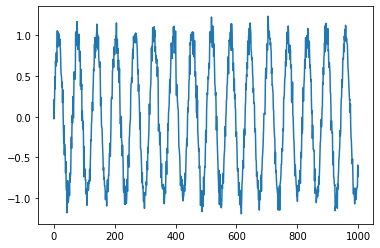

In [39]:
# Make the data
N = 1000
series = np.sin(0.1*np.arange(N)) + np.random.randn(N)*0.1

plt.plot(series)

In [40]:
# build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10) Y.shape (990, 1)


In [41]:
model = nn.Linear(T, 1)

In [42]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [43]:
# Make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [44]:
# Training
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs=200):
  
  # store losses
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    # Test loss
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it+1) % 5 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

  return train_losses, test_losses

In [45]:
train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

Epoch 5/200, Train Loss: 0.0253, Test Loss: 0.0777
Epoch 10/200, Train Loss: 0.0407, Test Loss: 0.0615
Epoch 15/200, Train Loss: 0.0264, Test Loss: 0.0434
Epoch 20/200, Train Loss: 0.0271, Test Loss: 0.0305
Epoch 25/200, Train Loss: 0.0205, Test Loss: 0.0244
Epoch 30/200, Train Loss: 0.0213, Test Loss: 0.0206
Epoch 35/200, Train Loss: 0.0199, Test Loss: 0.0191
Epoch 40/200, Train Loss: 0.0197, Test Loss: 0.0162
Epoch 45/200, Train Loss: 0.0191, Test Loss: 0.0155
Epoch 50/200, Train Loss: 0.0182, Test Loss: 0.0138
Epoch 55/200, Train Loss: 0.0175, Test Loss: 0.0135
Epoch 60/200, Train Loss: 0.0167, Test Loss: 0.0133
Epoch 65/200, Train Loss: 0.0167, Test Loss: 0.0133
Epoch 70/200, Train Loss: 0.0166, Test Loss: 0.0132
Epoch 75/200, Train Loss: 0.0164, Test Loss: 0.0129
Epoch 80/200, Train Loss: 0.0162, Test Loss: 0.0129
Epoch 85/200, Train Loss: 0.0161, Test Loss: 0.0129
Epoch 90/200, Train Loss: 0.0160, Test Loss: 0.0128
Epoch 95/200, Train Loss: 0.0160, Test Loss: 0.0127
Epoch 100/200

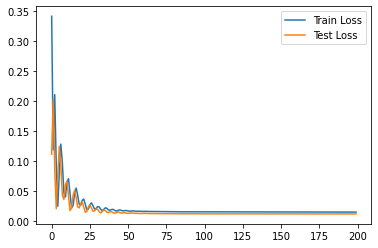

In [46]:
# Plot losses
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()

In [47]:
# incorrect forecast method
validation_target = Y[-N//2:]
validation_predictions = []

i = 0

while len(validation_predictions) <  len(validation_target):
  input_ = X_test[i].view(1, -1)
  p = model(input_)[0,0].item()
  i += 1

  validation_predictions.append(p)

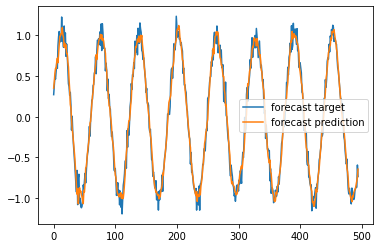

In [48]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [49]:
# Forcast future values

validation_target = Y[-N//2:]
validation_predictions = []

last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1, -1)
  p = model(input_)

  validation_predictions.append(p[0, 0].item())

  last_x = torch.cat((last_x[1:], p[0]))

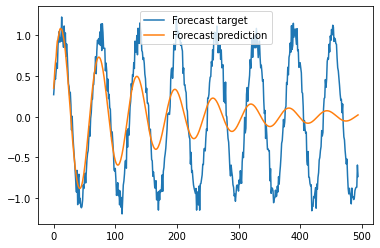

In [50]:
plt.plot(validation_target, label='Forecast target')
plt.plot(validation_predictions, label='Forecast prediction')
plt.legend()